<a href="https://colab.research.google.com/github/silvioedu/IGTI-MachileLearningBootcamp/blob/main/igti_pratica_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Arquivo de entrada disponível em:** https://github.com/silvioedu/IGTI-MachileLearningBootcamp/blob/main/modulo_1/pratica/data.csv

# Configurações

In [307]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set()

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [308]:
filename = 'input/data.csv'
df = pd.read_csv(filename)

In [309]:
def plot_feature(df, feature):
  """ Plotar boxplot e distplot
  ----------------------------
  df     : dataframe
  feature: variável disponível
  """  
  fig, axes = plt.subplots(1,2, figsize=(18,5))
  plt.suptitle(f"Feature '{feature}'")

  sns.boxplot(df[feature],ax = axes[0])
  sns.distplot(df[feature], kde=False, ax = axes[1])
  plt.xlabel("")

def numeric_feature(df):
  """ Retornar as features numericas para analise
  ----------------------------
  df     : dataframe
  """  
  return [i for i in df.columns if not i.endswith("_id") and np.dtype(df[i]) in ('int64', 'float64')]

def linear_regression(df, x, Y):
  """ Treinar e prever um modelo de regressão linear
  ----------------------------
  df     : dataframe
  """  
  lr = LinearRegression()
  model = lr.fit(x, Y)
  pred = model.predict(x)

  print(f'Equação linear: y = a{model.coef_} + {model.intercept_}')
  print(f'Coeficiente de determinação: {r2_score(Y, pred)}')
  return model, pred

# Análise exploratória

## Geral

In [310]:
# quantas observações e variáeis estão disponíveis
df.shape

(120, 14)

In [311]:
# visualizando as primeiras linhas
df.head()

,valid_import,item,importer_id,exporter_id,country_of_origin,declared_quantity,declared_cost,mode_of_transport,route,date_of_departure,date_of_arrival,declared_weight,actual_weight,days_in_transit
0,True,cigar,111,222,India,129,3784.402551,sea,asia,04/25/2019,05/13/2019,1608.605135,1637.661221,18.232857
1,True,cigar,111,222,India,104,3081.350806,sea,america,04/22/2019,05/24/2019,831.719301,848.273419,32.436029
2,True,cigar,111,222,India,130,4414.125741,sea,europe,04/29/2019,05/16/2019,1527.704165,1582.063911,16.996206
3,True,cigar,111,222,India,143,2533.535991,sea,panama,05/05/2019,05/25/2019,1138.680563,1179.993817,19.965886
4,True,cigar,111,222,China,141,4396.397887,sea,asia,05/14/2019,06/05/2019,761.744581,781.735080,22.160034


In [312]:
# como estão distribuídas as variáveis?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   valid_import       120 non-null    bool   
 1   item               120 non-null    object 
 2   importer_id        120 non-null    int64  
 3   exporter_id        120 non-null    int64  
 4   country_of_origin  120 non-null    object 
 5   declared_quantity  120 non-null    int64  
 6   declared_cost      120 non-null    float64
 7   mode_of_transport  120 non-null    object 
 8   route              120 non-null    object 
 9   date_of_departure  120 non-null    object 
 10  date_of_arrival    120 non-null    object 
 11  declared_weight    120 non-null    float64
 12  actual_weight      120 non-null    float64
 13  days_in_transit    120 non-null    float64
dtypes: bool(1), float64(4), int64(3), object(6)
memory usage: 12.4+ KB


**Anotações**

Não temos valores nulos

## Por Feature

In [313]:
num_ftr = numeric_feature(df)
print(f'Features numéricas {num_ftr}')

Features numéricas ['declared_quantity', 'declared_cost', 'declared_weight', 'actual_weight', 'days_in_transit']


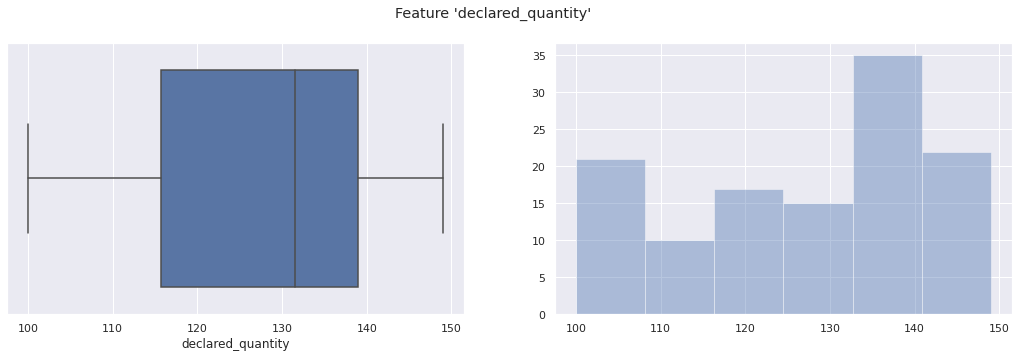

In [314]:
plot_feature(df, num_ftr[0])

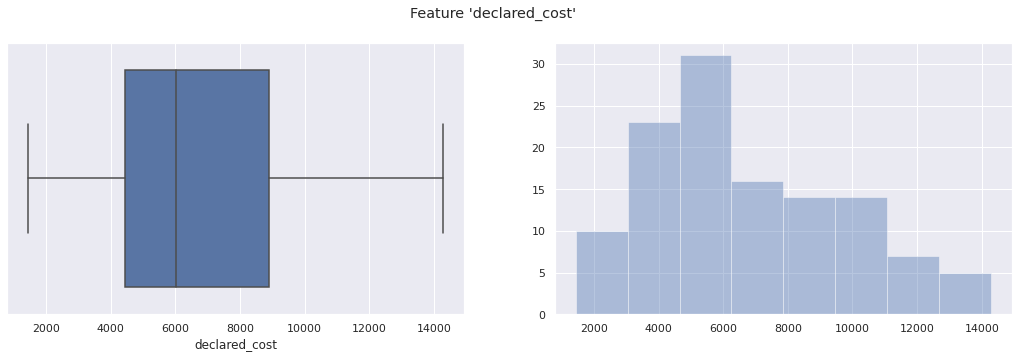

In [315]:
plot_feature(df, num_ftr[1])

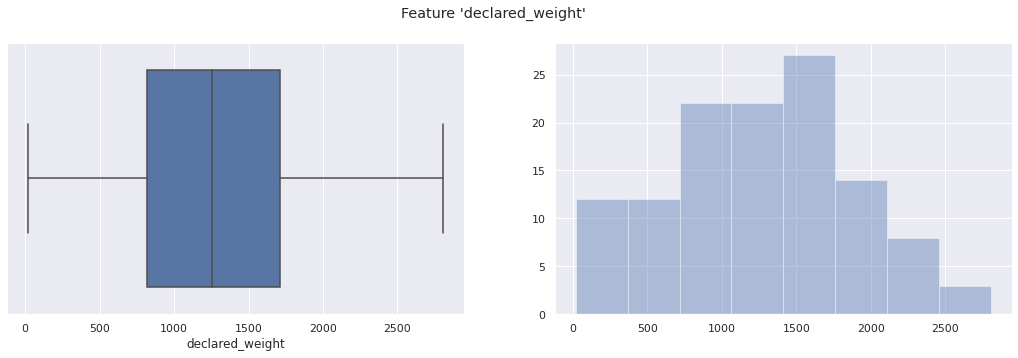

In [316]:
plot_feature(df, num_ftr[2])

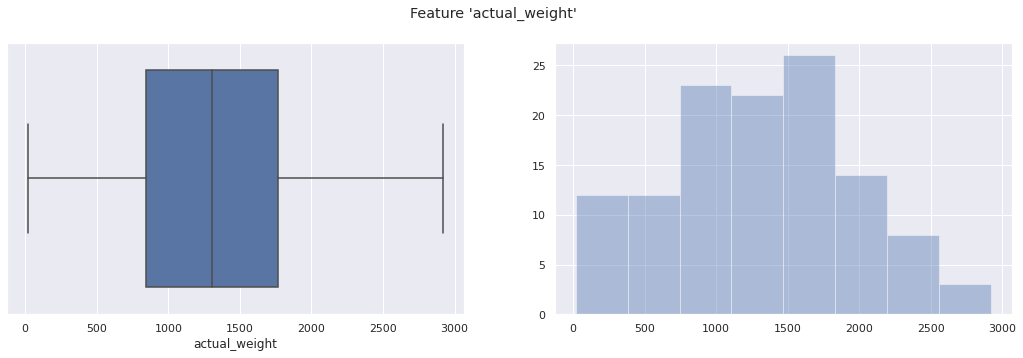

In [317]:
plot_feature(df, num_ftr[3])

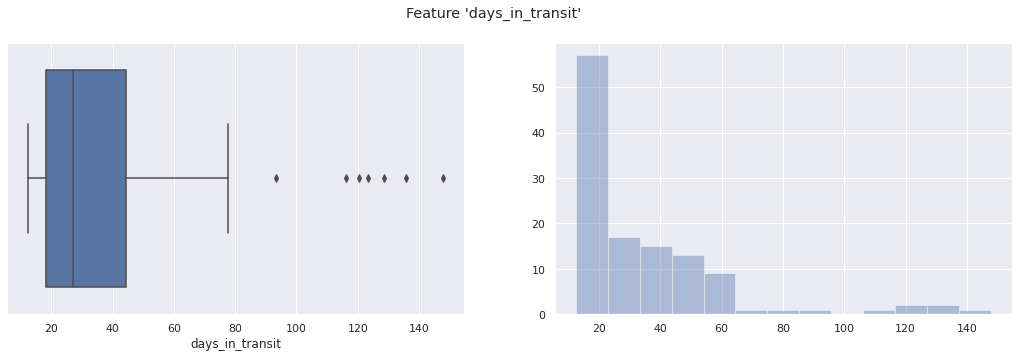

In [318]:
plot_feature(df, num_ftr[4])

**Anotações**

Há outliers na feature 'days_in_transit'

## Relacionamento entre features

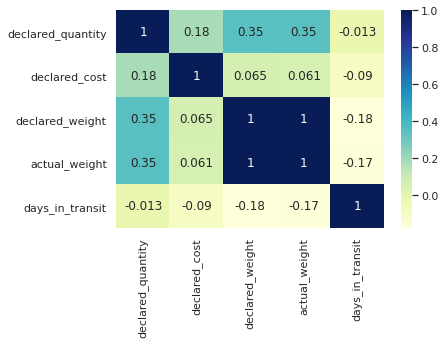

In [319]:
sns.heatmap(df[num_ftr].corr(), annot=True, cmap="YlGnBu")

**Anotações**

Forte correlação entre as features 'declared_weight' e 'actual_weight'

# Preparando o modelo e fazendo a previsão

In [320]:
x = df.declared_weight.values.reshape(-1,1)
Y = df.actual_weight.values

model, pred = linear_regression(df, x, Y)

Equação linear: y = a[1.03718115] + -5.296233030439225
Coeficiente de determinação: 0.9993288165644932


Text(0, 0.5, 'actual_weight')

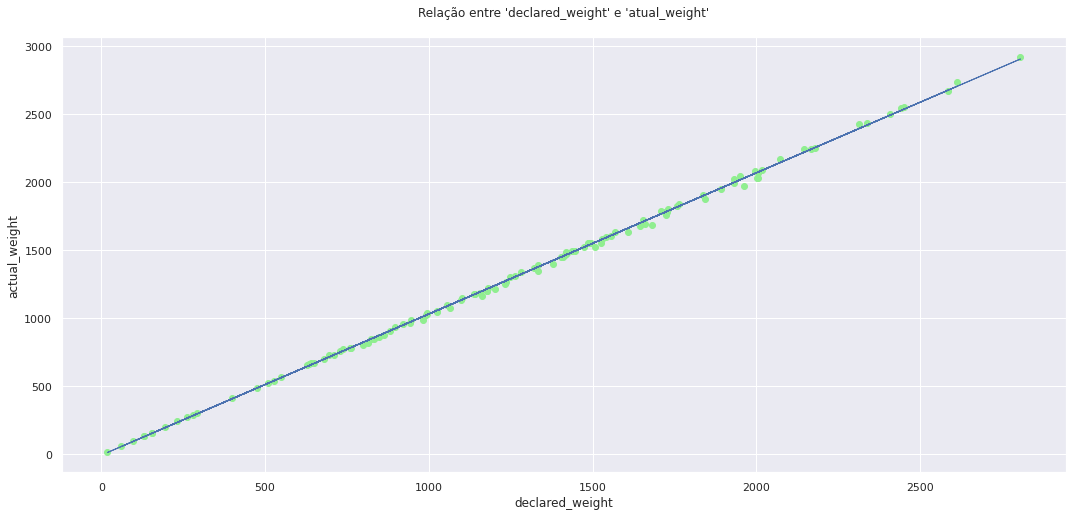

In [321]:
plt.figure(figsize = (18,8))
plt.scatter(x, Y,  color='lightgreen')
plt.plot(x, pred, color='b', linewidth=1)
plt.title("Relação entre 'declared_weight' e 'atual_weight'\n")
plt.xlabel('declared_weight')
plt.ylabel('actual_weight')

# Expondo o modelo para testes

In [322]:
x = np.array(float(input('Digite o peso declarado: ')))

Digite o peso declarado: 137.52


In [323]:
print(f'O peso atual previsto é: {np.round(model.predict(x.reshape(1, -1)),2)}')

O peso atual previsto é: [137.34]
